## **Model 12: Medium CNN (Model 5) with LeakyReLU + Adam and only vary dropout rate**

**Preprocessing from model 2**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

train_dir = "datasets/Training"
test_dir  = "datasets/Testing"

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Validation split
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)

# Normalize
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x,y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x,y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x,y: (normalization_layer(x), y))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


**With Leaky ReLU**
> Architecture
- Conv2D(32) → LeakyReLU → MaxPool
- Conv2D(64) → LeakyReLU → MaxPool
- Conv2D(128) → LeakyReLU → MaxPool
- Flatten → Dense(128, LeakyReLU) → Dense(4, softmax)

In [2]:
def build_medium_cnn_dropout(input_shape=(128,128,3), num_classes=4, dropout_rate=0.5):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.1),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

**Callbacks**

In [3]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-3, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='models/model12_best.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

**Train Variants**

In [4]:
for dropout_rate in [0.2, 0.5]:
    print(f"\nTraining Model 12 with dropout rate = {dropout_rate}")
    
    model12 = build_medium_cnn_dropout(dropout_rate=dropout_rate)
    model12.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    history12 = model12.fit(
        train_ds,
        validation_data=val_ds,
        epochs=50,
        callbacks=callbacks
    )


Training Model 12 with dropout rate = 0.2
Epoch 1/50


d:\Python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Python11\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.6344 - loss: 0.8907
Epoch 1: val_loss improved from None to 0.38379, saving model to models/model12_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 38s 245ms/step - accuracy: 0.7374 - loss: 0.6639 - val_accuracy: 0.8616 - val_loss: 0.3838 - learning_rate: 0.0010
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8666 - loss: 0.3772
Epoch 2: val_loss improved from 0.38379 to 0.28458, saving model to models/model12_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 26s 183ms/step - accuracy: 0.8811 - loss: 0.3366 - val_accuracy: 0.9089 - val_loss: 0.2846 - learning_rate: 0.0010
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9191 - loss: 0.2296
Epoch 3: val_loss improved from 0.28458 to 0.25920, saving model to models/model12_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 26s 177ms/step - accuracy: 0.9266 - loss: 0.2077 - val_accuracy: 0.9196 - val_loss: 0.2592 - learning_rate: 0.0010
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9450 - loss: 0.1464
Epoch 4: val_loss improved from 0.25920 to 0.20895, saving model to models/model12_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.9541 - loss: 0.1298 - val_accuracy: 0.9232 - val_loss: 0.2090 - learning_rate: 0.0010
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9717 - loss: 0.0952
Epoch 5: val_loss improved from 0.20895 to 0.18518, saving model to models/model12_best.h5


144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.9721 - loss: 0.0902 - val_accuracy: 0.9464 - val_loss: 0.1852 - learning_rate: 0.0010
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9757 - loss: 0.0716
Epoch 6: val_loss did not improve from 0.18518
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9806 - loss: 0.0590 - val_accuracy: 0.9393 - val_loss: 0.2340 - learning_rate: 0.0010
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9812 - loss: 0.0559
Epoch 7: val_loss did not improve from 0.18518
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9824 - loss: 0.0513 - val_accuracy: 0.9250 - val_loss: 0.2514 - learning_rate: 0.0010
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9779 - loss: 0.0576
Epoch 8: val_loss did not improve from 0.18518

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9826 - loss: 0.0471 - val_ac

144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.9634 - loss: 0.1081 - val_accuracy: 0.9402 - val_loss: 0.1822 - learning_rate: 5.0000e-04
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9648 - loss: 0.0969
Epoch 6: val_loss did not improve from 0.18216
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.9689 - loss: 0.0849 - val_accuracy: 0.9339 - val_loss: 0.1878 - learning_rate: 5.0000e-04
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.9802 - loss: 0.0686
Epoch 7: val_loss did not improve from 0.18216
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 171ms/step - accuracy: 0.9817 - loss: 0.0591 - val_accuracy: 0.9446 - val_loss: 0.1864 - learning_rate: 5.0000e-04
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9821 - loss: 0.0520
Epoch 8: val_loss did not improve from 0.18216

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 171ms/step - accuracy: 0.9852 - loss: 0.0

144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9930 - loss: 0.0259 - val_accuracy: 0.9518 - val_loss: 0.1816 - learning_rate: 2.5000e-04
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.9955 - loss: 0.0193
Epoch 10: val_loss did not improve from 0.18159
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.9948 - loss: 0.0193 - val_accuracy: 0.9571 - val_loss: 0.1857 - learning_rate: 2.5000e-04
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 5.


**Load best model**

In [5]:
best_model12 = tf.keras.models.load_model('models/model12_best.h5')

**Evaluate**

In [6]:
# Evaluate on test set
test_loss, test_acc = best_model12.evaluate(test_ds)
print(f"Model 12 (Dropout={dropout_rate}) - Test accuracy: {test_acc:.4f}")
print(f"Model 12 (Dropout={dropout_rate}) - Test loss: {test_loss:.4f}")

# Get final training & validation metrics
final_train_acc = history12.history['accuracy'][-1]
final_train_loss = history12.history['loss'][-1]
final_val_acc   = history12.history['val_accuracy'][-1]
final_val_loss  = history12.history['val_loss'][-1]

print(f"Model 12 (Dropout={dropout_rate}) - Final training accuracy: {final_train_acc:.4f}")
print(f"Model 12 (Dropout={dropout_rate}) - Final training loss: {final_train_loss:.4f}")
print(f"Model 12 (Dropout={dropout_rate}) - Final validation accuracy: {final_val_acc:.4f}")
print(f"Model 12 (Dropout={dropout_rate}) - Final validation loss: {final_val_loss:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9550 - loss: 0.1863
Model 12 (Dropout=0.5) - Test accuracy: 0.9550
Model 12 (Dropout=0.5) - Test loss: 0.1863
Model 12 (Dropout=0.5) - Final training accuracy: 0.9948
Model 12 (Dropout=0.5) - Final training loss: 0.0193
Model 12 (Dropout=0.5) - Final validation accuracy: 0.9571
Model 12 (Dropout=0.5) - Final validation loss: 0.1857


**Loss curve plotting**

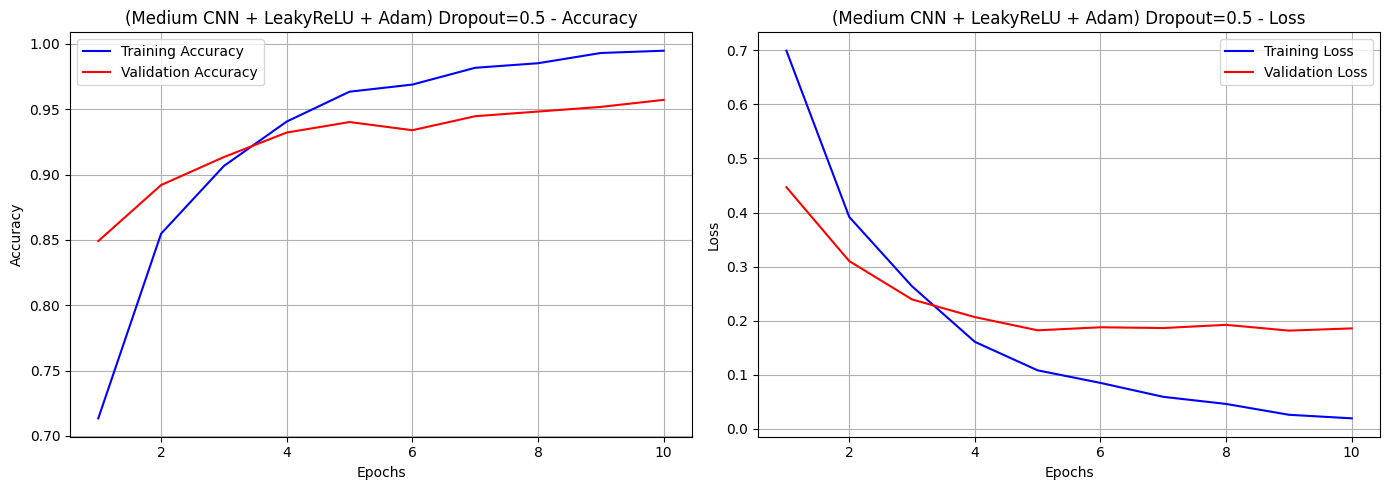

In [8]:
from plot import plot_training_curves
# Call the function for Model 12
plot_training_curves(history12, model_name=f"(Medium CNN + LeakyReLU + Adam) Dropout={dropout_rate}")

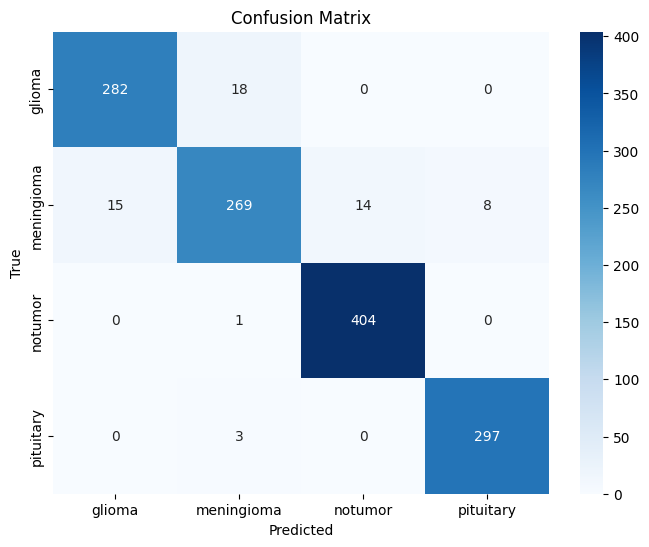


Classification Report:

              precision    recall  f1-score   support

      glioma       0.95      0.94      0.94       300
  meningioma       0.92      0.88      0.90       306
     notumor       0.97      1.00      0.98       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



In [3]:
from plot_utils import (
    plot_training_curves,
    evaluate_model_with_confusion,
    plot_confusion_matrix_from_dataset
)

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Confusion matrix with in-memory model
# evaluate_model_with_confusion(model19, test_ds, title="Confusion Matrix (Test)")

# Confusion matrix from saved model
plot_confusion_matrix_from_dataset("models/model12_best.h5", test_ds, class_names)
